In [1]:
!pip install nltk
!pip install autocorrect
!pip install scikit-learn

     ---------------------------------------- 0.0/622.8 kB ? eta -:--:--
     - ------------------------------------- 30.7/622.8 kB 1.4 MB/s eta 0:00:01
     ------ ------------------------------- 112.6/622.8 kB 1.3 MB/s eta 0:00:01
     ----------- -------------------------- 194.6/622.8 kB 1.5 MB/s eta 0:00:01
     -------------- ----------------------- 235.5/622.8 kB 1.4 MB/s eta 0:00:01
     ------------------------------ ------- 501.8/622.8 kB 2.4 MB/s eta 0:00:01
     -------------------------------------- 622.8/622.8 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622375 sha256=2266558b24c2205e599b0d6148dd737d18125f562834af0db9ce004e1dc946bf
  Stored in directory: c:\users\preet\appdata\local\pip\cache\wheels\b5\7b\6d\b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


For Preprocessing NLP Data
- removing non alphabatic characters
- lowering the format
- tokeninzation
- remove stop words
- steming / lemitization
- spell correction

In [2]:
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from autocorrect import Speller
spell=Speller()
from tqdm import tqdm
import re

In [3]:
data=pd.read_csv('data/spam.csv')

In [4]:
# data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)


In [7]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data.rename(columns={'v1':'labels','v2':'messages'},inplace=True)


In [9]:
data.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Visualize the Spam words


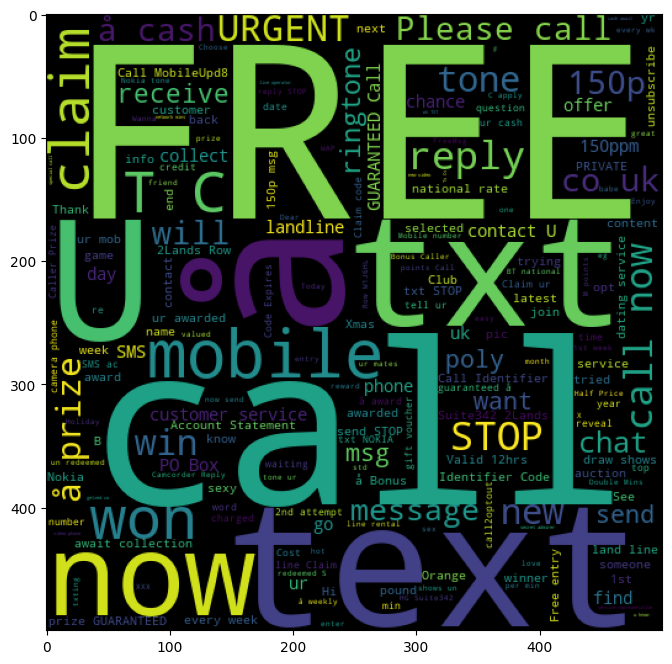

In [10]:
spam_words= ' '.join(list(data[data['labels']=='spam']['messages']))
spam_wc= WordCloud(width=500,height=500).generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

Visualize the Ham words


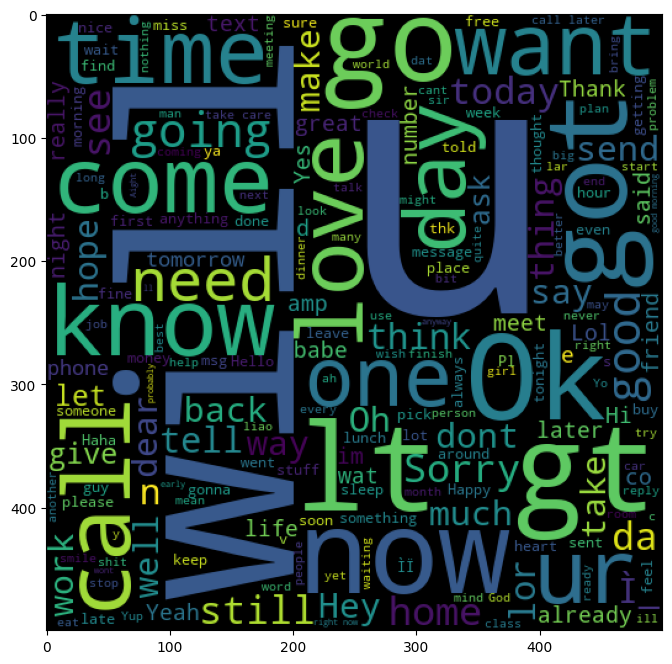

In [11]:
spam_words= ' '.join(list(data[data['labels']=='ham']['messages']))
spam_wc= WordCloud(width=500,height=500).generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()


# Preprocessing the Data


In [12]:
data.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
data.shape

(5572, 2)

In [15]:
# Encoding our Labels
data['labels']=data['labels'].apply(lambda x: 1 if x=='spam' else 0)

In [17]:
import nltk

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\preet\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [20]:
# preprocessing the Messages
new_data=[]

for i in tqdm(range(data.shape[0])):
    lines=data.iloc[i,1]
    # removing non alphabatic characters
    lines= re.sub('[^A-Za-z]',' ',lines)
    # lowering the every word
    lines=lines.lower()
    
    # tokenization
    tokenized_lines=word_tokenize(lines)
    
    # removing stop words ,stemming and spell correction
    processed_lines=[]
    for i in tokenized_lines:
        if i not in set(stopwords.words('english')):
            processed_lines.append(spell(stemmer.stem(i)))
            
    final_lines=' '.join(processed_lines)
    new_data.append(final_lines)
    

100%|██████████████████████████████████████████████████████████████████████████████| 5572/5572 [04:58<00:00, 18.67it/s]


In [22]:
# new_data
len(new_data)


5572

In [23]:
Y=data['labels']
Y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: labels, Length: 5572, dtype: int64

In [24]:
Y.value_counts()


0    4825
1     747
Name: labels, dtype: int64

# splitting the data into training and testing


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(new_data,Y,test_size=0.25)

In [28]:
X_train


['mobil number pl sm ur mail id convey regard chan alma rakhesh qatar',
 'wonder other took',
 'dude saw park car sunroof pop sup',
 'eat fo lunch senior',
 'trust even',
 'yeah got v apology n fallen actin like spoilt child got caught till go badly cheer',
 'time come tomorrow',
 'getting bit arti collar mo well trying ne way got roast min love shall enjoy',
 'love u little poli bell sorry love u',
 'receive mobil content enjoy',
 'boy late home father power friendship',
 'huh mean compute science like dat one push n',
 'u wan has lunch da canteen',
 'like spoil',
 'da car park',
 'lor ya go dinner together',
 'ok also wan watch e pm show',
 'got salt rub open wound like',
 'sorry call later',
 'heart empty without love mind empty without wisdom eye r empty without dream amp life empty without find ali touch good night amp sweet dream',
 'hmv bonus special pound genuine hmv voucher answer east question play send hmv info www percent real com',
 'erm ill pick pm give enough time get pa

In [29]:
Y_train


5008    0
1285    0
1562    0
2982    0
2076    0
       ..
3535    0
1605    0
1762    0
2802    1
3263    0
Name: labels, Length: 4179, dtype: int64

In [30]:
Y_test


3680    0
1937    0
2409    0
2404    0
1497    0
       ..
2423    0
5518    0
5443    1
1000    0
3386    0
Name: labels, Length: 1393, dtype: int64

# Vectorization using Bag of Words


In [31]:
from sklearn.feature_extraction.text import CountVectorizer  #tf_idf
matrix=CountVectorizer()

In [32]:
X_train_vect=matrix.fit_transform(X_train).toarray()
X_test_vect=matrix.transform(X_test).toarray()

In [33]:
X_train_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [34]:
X_test_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [35]:
Y_train

5008    0
1285    0
1562    0
2982    0
2076    0
       ..
3535    0
1605    0
1762    0
2802    1
3263    0
Name: labels, Length: 4179, dtype: int64

In [36]:
Y_test

3680    0
1937    0
2409    0
2404    0
1497    0
       ..
2423    0
5518    0
5443    1
1000    0
3386    0
Name: labels, Length: 1393, dtype: int64

# Lets train our Model - Naive Bayes


In [37]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [38]:
model.fit(X_train_vect,Y_train)


GaussianNB()

In [39]:
model.classes_


array([0, 1], dtype=int64)

In [40]:
Y_pred=model.predict(X_test_vect)


In [41]:
Y_pred


array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix


In [43]:
accuracy_score(Y_test,Y_pred) * 100


84.70926058865757

In [44]:
confusion_matrix(Y_test,Y_pred)


array([[1016,  177],
       [  36,  164]], dtype=int64)